<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/MeenakshiPoorani/formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team 19:

We are creating a Hypothesis from Formula 1 Data Sets recruiting for a specic constructor by analyzing and focusing on Data from the following files:

*driver *results *lap times

We are going to do a basic analysis of the top ten drivers.

How many wins they have from the previous season for 2023? The average race lap times for the 2023 per driver?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fastf1
import seaborn as sns



In [2]:
pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.6 MB/s eta 0:00:00


Read files

In [10]:
results = pd.read_csv('/content/formula1/results.csv')
races=pd.read_csv('/content/formula1/races.csv')
drivers=pd.read_csv('/content/formula1/drivers.csv')
constructors=pd.read_csv('/content/formula1/constructors.csv')
status=pd.read_csv('/content/formula1/status.csv')
driver_standings=pd.read_csv('/content/formula1/driver_standings.csv')

In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
# prompt: top 5 drivers performance


# Group the results by driver and calculate the sum of points
driver_points = results.groupby('driverId')['points'].sum()

# Sort the drivers by points in descending order
sorted_drivers = driver_points.sort_values(ascending=False)

# Print the top 5 drivers and their points
print(sorted_drivers.head(5))


driverId
1      4540.5
20     3098.0
830    2275.5
4      2203.0
8      1873.0
Name: points, dtype: float64


Merging all columns

# New Section

In [ ]:
df = pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
df=pd.merge(df,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
df=pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')
df=pd.merge(df,status[['statusId','status']],on='statusId',how='left')
pd.get_option("display.max_columns",None)
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,round,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07,McLaren,British,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10,BMW Sauber,German,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27,Williams,British,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29,Renault,French,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19,McLaren,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31,Williams,British,Finished
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19,Haas F1 Team,American,Finished
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage


Driver Name

In [ ]:
df['driverName']=df['forename']+ ' '+ df['surname']
df.drop(['forename','surname'],axis=1,inplace=True)

Top drivers in 2023

In [ ]:


# Filter data for 2023
df_2023 = df[df['year'] == 2023]


# Group by driver and sum points
driver_points_2023 = df_2023.groupby('driverRef')['points'].sum()

# Sort by points in descending order
sorted_drivers_2023 = driver_points_2023.sort_values(ascending=False)

# Print the top 5 drivers and their points
print(sorted_drivers_2023.head(10))


driverRef
max_verstappen    292.0
perez             174.0
hamilton          144.0
alonso            142.0
russell            92.0
leclerc            88.0
sainz              77.0
norris             66.0
stroll             41.0
ocon               33.0
Name: points, dtype: float64


In [ ]:
# prompt: remove column driver_name

df.drop(columns=["driver_name"], inplace=True)


In [ ]:
df_2023.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status,driverName
25840,25846,1098,830,9,1,1,1,1,1,25.0,...,2023-03-05,max_verstappen,Max,Verstappen,Dutch,1997-09-30,Red Bull,Austrian,Finished,Max Verstappen
25841,25847,1098,815,9,11,2,2,2,2,18.0,...,2023-03-05,perez,Sergio,Pérez,Mexican,1990-01-26,Red Bull,Austrian,Finished,Sergio Pérez
25842,25848,1098,4,117,14,5,3,3,3,15.0,...,2023-03-05,alonso,Fernando,Alonso,Spanish,1981-07-29,Aston Martin,British,Finished,Fernando Alonso
25843,25849,1098,832,6,55,4,4,4,4,12.0,...,2023-03-05,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Finished,Carlos Sainz
25844,25850,1098,1,131,44,7,5,5,5,10.0,...,2023-03-05,hamilton,Lewis,Hamilton,British,1985-01-07,Mercedes,German,Finished,Lewis Hamilton


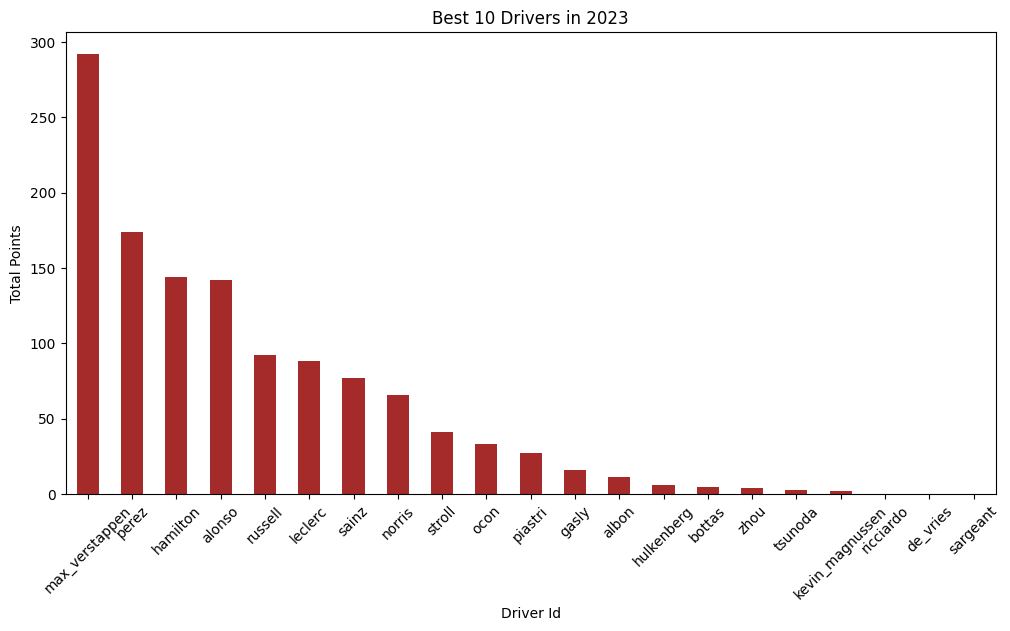

In [ ]:
plt.figure(figsize=(12, 6))
sorted_drivers_2023.plot(kind='bar', color='brown')
plt.xlabel('Driver Id')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in 2023')
plt.xticks(rotation=45)
plt.show()

Top 10 overall driver performance

In [ ]:
top_drivers = pd.merge(driver_standings, drivers, on='driverId')

top_drivers = top_drivers.groupby('driverRef')['points'].sum()
top_drivers = top_drivers.sort_values(ascending=False).head(10)

In [ ]:
print(top_drivers)

driverRef
hamilton              46550.5
vettel                32026.0
max_verstappen        22486.5
alonso                21692.0
bottas                19458.0
raikkonen             19069.0
rosberg               16910.0
michael_schumacher    14514.0
perez                 13756.0
ricciardo             13626.0
Name: points, dtype: float64


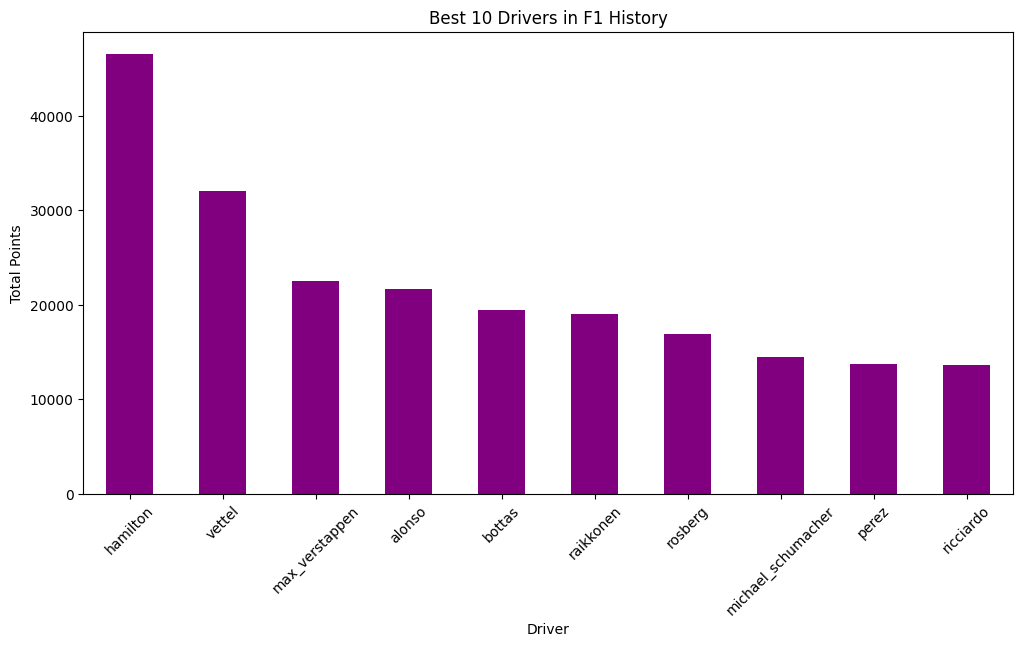

In [ ]:
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='bar', color='purple')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in F1 History')
plt.xticks(rotation=45)
plt.show()

Best Teams overall

In [11]:
the_best_teams=constructors.merge(results,on = 'constructorId',how = 'left')
the_best_teams = the_best_teams[['name','points','raceId']]
the_best_teams = the_best_teams.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
the_best_teams = the_best_teams[the_best_teams['races'] >= 100]
the_best_teams

,name,races
0,Ferrari,1066
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
5,Team Lotus,395
6,Sauber,395
7,Red Bull,360
8,Minardi,345
9,Ligier,330


<ipython-input-14-d9f237248d43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='races', y='name', data=the_best_teams, palette='viridis')


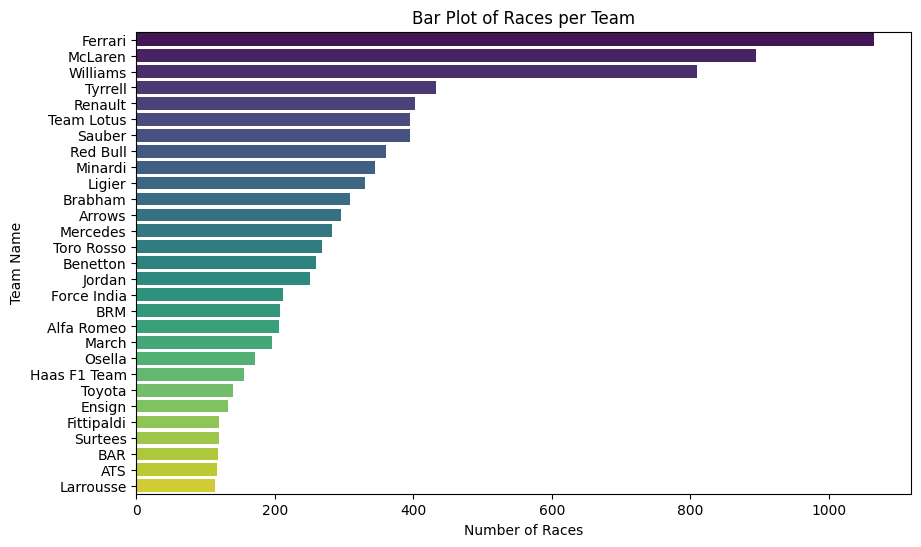

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='races', y='name', data=the_best_teams, palette='viridis')
plt.xlabel('Number of Races')
plt.ylabel('Team Name')
plt.title('Bar Plot of Races per Team')
plt.show()

Top 10 circuits (No.of times races happened)

In [15]:
races.value_counts()
counts = races['name'].value_counts()
circuits_pop = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_pop

,circuitId,number of times
0,Italian Grand Prix,74
1,British Grand Prix,74
2,Monaco Grand Prix,69
3,Belgian Grand Prix,68
4,German Grand Prix,64
5,French Grand Prix,62
6,Spanish Grand Prix,53
7,Canadian Grand Prix,52
8,Brazilian Grand Prix,48
9,United States Grand Prix,44


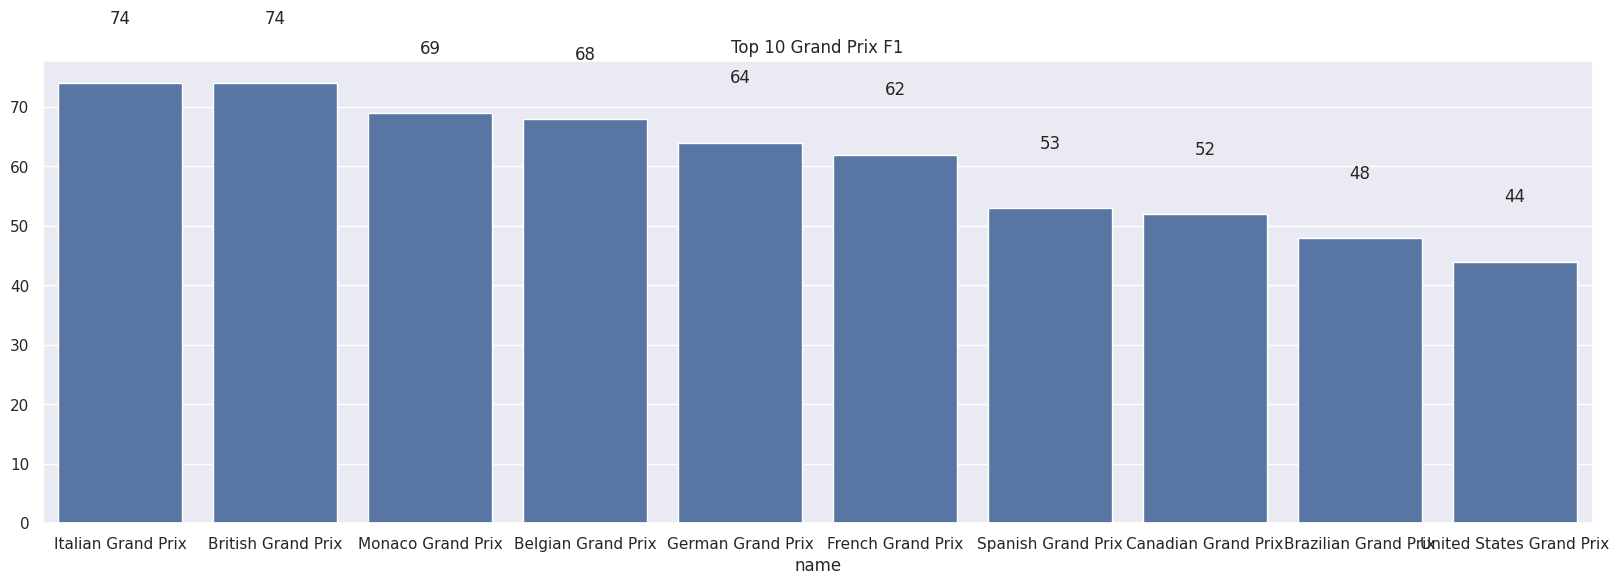

In [16]:
top_10_circuits=races['name'].value_counts()[:10]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_10_circuits.index, y=top_10_circuits.values)
ax.set_title("Top 10 Grand Prix F1")


for i, v in enumerate(top_10_circuits):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)


plt.show()